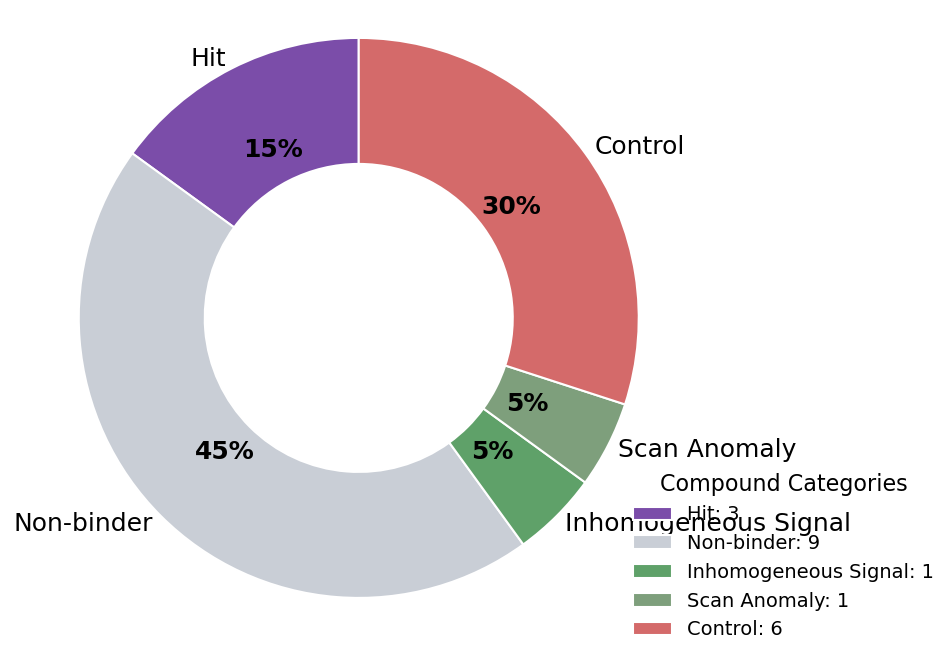

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

file1 = Path("first screening overview.xlsx")
file2 = Path("second screening overview.xlsx")
file3 = Path("third screening overview.xlsx")

def extract_ligand_categories(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    out = out[out["Ligand Information"].notna()]
    out = out[out["Ligand Information"] != "Name"]
    out = out[~out["Ligand Information"].astype(str).str.contains("Data Point", na=False)]
    out = out.rename(columns={"Ligand Information": "Ligand", "Analysis Results": "Category"})
    out["Category"] = out["Category"].astype(str).str.strip()
    return out[["Ligand", "Category"]].dropna(subset=["Category"])

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df3 = pd.read_excel(file3)
lig_all = pd.concat(
    [extract_ligand_categories(df1),
     extract_ligand_categories(df2),
     extract_ligand_categories(df3)],
    ignore_index=True
)

order = ["Hit", "Non-binder", "Inhomogeneous Signal", "Scan Anomaly", "Control"]
counts = lig_all["Category"].value_counts()
counts = counts.reindex(order).dropna().astype(int)

colors = {
    "Hit": "#7B4DA9",
    "Non-binder": "#C9CED6",
    "Inhomogeneous Signal": "#5FA169",
    "Scan Anomaly": "#7E9F7C",
    "Control": "#D46A6A"
}

inner_r = 0.45
ring_w  = 0.45
mid_r   = inner_r + ring_w/2

fig, ax = plt.subplots(figsize=(9, 8))
wedges, texts, autotexts = ax.pie(
    counts.values,
    labels=counts.index,
    autopct="%1.0f%%",
    startangle=90,
    pctdistance=mid_r,
    labeldistance=1.04,
    colors=[colors[c] for c in counts.index],
    wedgeprops=dict(width=ring_w, edgecolor="white", linewidth=1.5),
    textprops=dict(color="black", fontsize=18),
)

ax.add_artist(plt.Circle((0, 0), inner_r, fc="white"))
ax.axis("equal")

for t in autotexts:
    t.set_fontsize(18)
    t.set_weight("bold")

legend_labels = [f"{cat}: {cnt}" for cat, cnt in zip(counts.index, counts.values)]
legend_labels.append(f"Total: {counts.sum()}")

ax.legend(
    wedges,
    legend_labels,
    title="Compound Categories",
    loc="lower right",
    bbox_to_anchor=(1.35, -0.05),
    fontsize=14,
    title_fontsize=16,
    frameon=False
)

plt.savefig("ligand_cake_plot_thick.png", dpi=300, bbox_inches="tight")
plt.savefig("ligand_cake_plot_thick.pdf", dpi=300, bbox_inches="tight")
plt.show()
